# RESPOSTAS AS QUESTÕES FORMULADAS

## ❓ Perguntas 
1.  Como evoluiu a declaração étnica ao longo do tempo?
2.  Como evoluiu o perfil étnico da universidade ao longo do tempo, em particular no pré, durante e pós pandemia?
3.  Qual é a relação entre a cota de ingresso dos alunos e sua região (estado/sub-região?) de origem?
4.  A quarentena influenciou a diversidade regional dos alunos? Se sim, como?
5.  A quarentena influenciou a ingreso mais diverso de alunos em relação ao gênero no curso de Ciência da Computação? Se sim, como?
6.  Como a demanda por curso foi afetada pela passagem do tempo? E pela pandemia?
7.  Qual é o tempo de permanência média por curso ao longo do tempo? (destaque para a pandemia)
8.  Como evoluíram as notas do enem por curso ao longo do tempo (por ano)? E como foi essa evolução por contas?
9.  Como é a média do CR por ano e por áreas de conhecimento?
10. Qual campus recebe mais pessoas de fora do estado de Minas Gerais?
11. O tempo de duração definido para os cinco cursos mais frequentados condiz com a media de duração gasto pelos alunos?


## Imports básicos


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import math
import unidecode
import Funcoes

##  Lendo dataframe


In [2]:
df = pd.read_csv("../Datasets/dadosFiltrados.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74026 entries, 0 to 74025
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Identificador            74026 non-null  int64  
 1   Ano_Nascimento           73949 non-null  float64
 2   Sexo                     73986 non-null  object 
 3   Campus                   74026 non-null  object 
 4   Curso_Identificador      74026 non-null  int64  
 5   Curso                    74026 non-null  object 
 6   UF_Nascimento            73965 non-null  object 
 7   Municipio_Nascimento     74026 non-null  object 
 8   Admissao                 74026 non-null  object 
 9   Saida                    74026 non-null  object 
 10  Codigo_Situacao_Aluno    74026 non-null  object 
 11  Situacao_Aluno           74026 non-null  object 
 12  Situacao_Aluno_Agrupada  74026 non-null  object 
 13  Modalidade_Inscrita      68753 non-null  float64
 14  ENEM                  

In [3]:
df['Sexo'] = df['Sexo'].astype(str)
df['Campus'] = df['Campus'].astype(str)
df['Curso'] = df['Curso'].astype(str)
df['UF_Nascimento'] = df['UF_Nascimento'].astype(str)
df['Municipio_Nascimento'] = df['Municipio_Nascimento'].astype(str)
df['Admissao'] = df['Admissao'].astype(str)
df['Saida'] = df['Saida'].astype(str)
df['Codigo_Situacao_Aluno'] = df['Codigo_Situacao_Aluno'].astype(str)
df['Situacao_Aluno'] = df['Situacao_Aluno'].astype(str)
df['Situacao_Aluno_Agrupada'] = df['Situacao_Aluno_Agrupada'].astype(str)
df['Raca'] = df['Raca'].astype(str)

## Resposta 1: 

- Como evoluiu a declaração étnica ao longo do tempo?


Após algumas plotagens dos gráficos, percebeu-se que a quantidade de pessoas que entravam nos períodos pares (segundo semetre de cada ano e disciplinas de verão) não era significativa. Por conta disso e para melhor visualização dos dados, usou-se como base a quantidade de entradas por ano, e não por semestre

In [ ]:
dfEtnico = df[['Raca','Admissao']]
dfEtnico['Admissao'] = dfEtnico['Admissao'].apply(lambda x : str(x)[:4]) #Pegando apenas o ano
dfEtnicoPorPeriodo = dfEtnico.groupby('Admissao').value_counts().reset_index().sort_values(by='Admissao') # Agrupando as raças por ano
dfEtnicoPorPeriodo


In [ ]:
dfEtnico = df[['Raca','Admissao']]
dfEtnico['Admissao'] = dfEtnico['Admissao'].apply(lambda x : str(x)[:4])
dfEtnicoPorPeriodo = dfEtnico.groupby('Admissao').value_counts().reset_index().sort_values(by='Admissao')

plt.figure(figsize=(17,5))
dfBrancos = dfEtnicoPorPeriodo[dfEtnicoPorPeriodo['Raca'] == 'Branco(a)']
dfPretos = dfEtnicoPorPeriodo[dfEtnicoPorPeriodo['Raca'] == 'Preto(a)']
dfIndiponivel = dfEtnicoPorPeriodo[dfEtnicoPorPeriodo['Raca'] == 'Informação não disponível']
dfAmarelo = dfEtnicoPorPeriodo[dfEtnicoPorPeriodo['Raca'] == 'Amarelo(a)']
dfPardo = dfEtnicoPorPeriodo[dfEtnicoPorPeriodo['Raca'] == 'Pardo(a)']
dfIndigena = dfEtnicoPorPeriodo[dfEtnicoPorPeriodo['Raca'] == 'Indígena']

# Plotando gráfico de linhas para visualizar evolução ao longo do tempo
plt.plot(dfBrancos['Admissao'], dfBrancos['count'], label='Branco(a)', linewidth=3)
plt.plot(dfPretos['Admissao'], dfPretos['count'], label='Preto(a)', linewidth=3)
plt.plot(dfIndigena['Admissao'], dfIndigena['count'], label='Indigena', linewidth=3)
plt.plot(dfIndiponivel['Admissao'], dfIndiponivel['count'], label='Indisponível', linewidth=3)
plt.plot(dfPardo['Admissao'], dfPardo['count'], label='Pardo(a)', linewidth=3)
plt.plot(dfAmarelo['Admissao'], dfAmarelo['count'], label='Amarelo(a)', linewidth=3)
plt.xticks(rotation=90)
plt.legend()
plt.xlabel('Data de Admissao')
plt.ylabel('Quantidade')
plt.show()

No gráfico acima, podemos perceber que a declaração étnica ao longo do tempo teve uma melhora significativa ao longo dos anos. Antes de 2007, a grande maioria dos alunos não se classificava étnicamente. 

Porém, entre 2006 e 2009 podemos ver um crescimento bastante significativo da declaração de identidade racial dos alunos, atingindo uma certa estabilidade entre 2011 e 2018.

Uma das coisas que se pode perceber é que os dados do dataset seguem uma distribuição de raças bem próxima à da realidade brasileira. Consultando sites como [agencia-noticias](https://agenciadenoticias.ibge.gov.br/agencia-noticias/2012-agencia-de-noticias/noticias/38719-censo-2022-pela-primeira-vez-desde-1991-a-maior-parte-da-populacao-do-brasil-se-declara-parda), podemos perceber esse padrão.

![Raças no Brasil](Imagens/racas.png)

Uma das possíveis interpretações desses dados é que a população brasileira passou a se identificar mais com suas raças, não só devido a conscientização de pensamentos sobre identidade cultural e pela maior incentivo à valorização dessas identidades, mas também pode se tratar de um reflexo da implementação de leis, tais como a [lei de cotas de 2012](http://portal.mec.gov.br/component/tags/tag/politica-de-cotas#:~:text=A%20política%20de%20cotas%20foi,proposta%20foi%20aprovada%20por%20unanimidade.), que podem ter servido de incentivo para a melhoria desse quadro


## Resposta 2:
- Como evoluiu o perfil étnico da universidade ao longo do tempo, em particular no pré, durante e pós pandemia?


In [ ]:
dfEtnico = df[['Raca', 'Admissao_Ano']]
dfEtnicoAntes = dfEtnico[dfEtnico['Admissao_Ano'] < 2020]
dfEtnicoDurante = dfEtnico[dfEtnico['Admissao_Ano'] >= 2019]
dfEtnicoPorPeriodoAntes = dfEtnicoAntes.groupby('Admissao_Ano').value_counts().reset_index().sort_values(by='Admissao_Ano')
dfEtnicoPorPeriodoDurante = dfEtnicoDurante.groupby('Admissao_Ano').value_counts().reset_index().sort_values(by='Admissao_Ano')


# plotando antes da pandemia
plt.figure(figsize=(17,5))
dfBrancosAntes = dfEtnicoPorPeriodoAntes[dfEtnicoPorPeriodoAntes['Raca'] == 'Branco(a)']
dfPretosAntes = dfEtnicoPorPeriodoAntes[dfEtnicoPorPeriodoAntes['Raca'] == 'Preto(a)']
dfIndiponivelAntes = dfEtnicoPorPeriodoAntes[dfEtnicoPorPeriodoAntes['Raca'] == 'Informação não disponível']
dfAmareloAntes = dfEtnicoPorPeriodoAntes[dfEtnicoPorPeriodoAntes['Raca'] == 'Amarelo(a)']
dfPardoAntes = dfEtnicoPorPeriodoAntes[dfEtnicoPorPeriodoAntes['Raca'] == 'Pardo(a)']
dfIndigenaAntes = dfEtnicoPorPeriodoAntes[dfEtnicoPorPeriodoAntes['Raca'] == 'Indígena']

# Plotando gráfico de linhas para visualizar evolução ao longo do tempo
datas = np.sort(dfEtnicoAntes['Admissao_Ano'].unique())
plt.plot(dfBrancosAntes['Admissao_Ano'], dfBrancosAntes['count'], label='Branco(a)', linewidth=3)
plt.plot(dfPretosAntes['Admissao_Ano'], dfPretosAntes['count'], label='Preto(a)', linewidth=3)
plt.plot(dfIndigenaAntes['Admissao_Ano'], dfIndigenaAntes['count'], label='Indigena', linewidth=3)
plt.plot(dfIndiponivelAntes['Admissao_Ano'], dfIndiponivelAntes['count'], label='Indisponível', linewidth=3)
plt.plot(dfPardoAntes['Admissao_Ano'], dfPardoAntes['count'], label='Pardo(a)', linewidth=3)
plt.plot(dfAmareloAntes['Admissao_Ano'], dfAmareloAntes['count'], label='Amarelo(a)', linewidth=3)
plt.xticks(datas.astype(int), rotation=90)

plt.legend()
plt.xlabel('Data de Admissao')
plt.ylabel('Quantidade')
plt.title("Perfil étnico antes da pandemia")
plt.show()

#plotando durante pandemia
plt.figure(figsize=(17,5))
dfBrancosDurante = dfEtnicoPorPeriodoDurante[dfEtnicoPorPeriodoDurante['Raca'] == 'Branco(a)']
dfPretosDurante = dfEtnicoPorPeriodoDurante[dfEtnicoPorPeriodoDurante['Raca'] == 'Preto(a)']
dfIndiponivelDurante = dfEtnicoPorPeriodoDurante[dfEtnicoPorPeriodoDurante['Raca'] == 'Informação não disponível']
dfAmareloDurante = dfEtnicoPorPeriodoDurante[dfEtnicoPorPeriodoDurante['Raca'] == 'Amarelo(a)']
dfPardoDurante = dfEtnicoPorPeriodoDurante[dfEtnicoPorPeriodoDurante['Raca'] == 'Pardo(a)']
dfIndigenaDurante = dfEtnicoPorPeriodoDurante[dfEtnicoPorPeriodoDurante['Raca'] == 'Indígena']

# Plotando gráfico de linhas para visualizar evolução ao longo do tempo
datas = np.sort(dfEtnicoDurante['Admissao_Ano'].unique())
plt.plot(dfBrancosDurante['Admissao_Ano'], dfBrancosDurante['count'], label='Branco(a)', linewidth=3)
plt.plot(dfPretosDurante['Admissao_Ano'], dfPretosDurante['count'], label='Preto(a)', linewidth=3)
plt.plot(dfIndigenaDurante['Admissao_Ano'], dfIndigenaDurante['count'], label='Indigena', linewidth=3)
plt.plot(dfIndiponivelDurante['Admissao_Ano'], dfIndiponivelDurante['count'], label='Indisponível', linewidth=3)
plt.plot(dfPardoDurante['Admissao_Ano'], dfPardoDurante['count'], label='Pardo(a)', linewidth=3)
plt.plot(dfAmareloDurante['Admissao_Ano'], dfAmareloDurante['count'], label='Amarelo(a)', linewidth=3)
plt.xticks(datas.astype(int), rotation=90)

plt.legend()
plt.xlabel('Data de Admissao')
plt.ylabel('Quantidade')
plt.title("Perfil étnico durante a pandemia")
plt.show()

Como podemos observar nos gráficos em 2008 houve um crescente avanço na declaração de etnias com seu ápice em 2018, posteriormente em 2019 houve um aumento significativo dos dados indísponíveis mas em 2020 voltou a se estabilizar

Com o crescente aumento da declaração foi possível observar que em todos os gráficos a declaração branca sempre foi maior, seguido da declaração parda e preta.

As declarações amarela e indígena, mesmo com o aumento dos dados disponíveis, sempre foram baixas, o que nos indica uma baixa representatividade destas declarações 

É valido observar também que a maior crescente se deu dado as disponibilidades dos dados.

## Resposta 3:
- Qual é a relação entre a cota de ingresso dos alunos e sua região (estado/sub-região?) de origem?

Nessa questão, optou-se por realizar a análise com base na região, para tornar os dados mais claros na visualização.

In [ ]:
# CSV que associa estados a regiões
dfRegioes = pd.read_csv("../Datasets/EstadosERegioes.csv")

t = df[["UF_Nascimento", "Modalidade_Inscrita"]].copy(deep=True)
t = t[t["Modalidade_Inscrita"] != 0] # ignorando modalidade não informada

# Agrupando os dados por região e convertendo para porcentagem
cotas_regioes = t.merge(dfRegioes, on='UF_Nascimento')[["Regiao", "Modalidade_Inscrita"]]
cotas_regioes = cotas_regioes.groupby("Regiao").value_counts(normalize=True).unstack()
cotas_regioes = cotas_regioes.mul(100).round(2).fillna(0).reset_index()

# Gráfico
cotas_regioes.index = cotas_regioes["Regiao"]
cotas_regioes.plot(kind="bar", figsize=(10,10))
plt.yscale("log")
plt.xticks(rotation=0)
plt.show()

cotas_regioes

## Resposta 4: 
- A quarentena influenciou a diversidade regional dos alunos? Se sim, como?

Nessa questão, optou-se por realizar a análise com base na região, para tornar os dados mais claros de visualizar. Para a região sudeste, por ser região de origem da grande maioria dos alunos, foi feita também uma análise por estado. Em ambas as análises, não constatou-se impacto da pandemia na diversidade regional.

In [ ]:
# CSV que associada estados a regiões
dfRegioes = pd.read_csv("../Datasets/EstadosERegioes.csv")

# Ignorando 2023, pois seus dados regionais são insuficientes (incompletos)
t = df[["Admissao_Ano", "UF_Nascimento"]]
admissao_geo = t.merge(dfRegioes, on="UF_Nascimento")
admissao_geo = admissao_geo[admissao_geo["Admissao_Ano"] != 2023]

# Agrupando por região e convertendo para porcentagem
admissao_regiao = admissao_geo[["Admissao_Ano", "Regiao"]]
admissao_regiao = admissao_regiao.groupby("Admissao_Ano").value_counts(normalize=True).unstack()
admissao_regiao = admissao_regiao.mul(100).round(2).reset_index()

# Gráfico por região
plt.figure(figsize=(17,5))
plt.plot(admissao_regiao["Admissao_Ano"], admissao_regiao["Norte"], label="Norte")
plt.plot(admissao_regiao["Admissao_Ano"], admissao_regiao["Nordeste"], label="Nordeste")
plt.plot(admissao_regiao["Admissao_Ano"], admissao_regiao["Centro-oeste"], label="Centro-oeste")
plt.plot(admissao_regiao["Admissao_Ano"], admissao_regiao["Sudeste"], label="Sudeste")
plt.plot(admissao_regiao["Admissao_Ano"], admissao_regiao["Sul"], label="Sul")
plt.yscale("log")
plt.ylabel("Porcentagem de alunos admitidos")
plt.xlabel("Ano de Admissão")
plt.title("Distribuição regional percentual dos alunos admitidos na UFV a cada ano")
plt.legend()
plt.show()

# Filtrando pela região sudeste, agrupando por estado e convertendo para porcentagem
admissao_sudeste = admissao_geo[admissao_geo["Regiao"] == "Sudeste"][["UF_Nascimento", "Admissao_Ano"]]
admissao_sudeste = admissao_sudeste.groupby("Admissao_Ano").value_counts(normalize=True).unstack()
admissao_sudeste = admissao_sudeste.mul(100).round(200).reset_index()

# Gráfico por estado do sudeste
plt.figure(figsize=(17,5))
plt.plot(admissao_sudeste["Admissao_Ano"], admissao_sudeste["MG"], label="Minas Gerais")
plt.plot(admissao_sudeste["Admissao_Ano"], admissao_sudeste["SP"], label="São Paulo")
plt.plot(admissao_sudeste["Admissao_Ano"], admissao_sudeste["ES"], label="Espírito Santo")
plt.plot(admissao_sudeste["Admissao_Ano"], admissao_sudeste["RJ"], label="Rio de Janeiro")
plt.ylabel("Porcentagem de alunos do Sudeste admitidos")
plt.xlabel("Ano de Admissão")
plt.title("Distribuição estadual percentual dos alunos do Sudeste admitidos na UFV a cada ano")
plt.legend()
plt.show()

admissao_regiao

## Resposta 5
-  A quarentena influenciou a ingreso mais diverso de alunos em relação ao gênero no curso de Ciência da Computação? Se sim, como?

In [ ]:
# Quarentena (a partir do 1º ano que houve ingressantes, 2020 a 2022)
dfQ5 = df.copy()

dfQ5 = dfQ5[dfQ5['Curso'] == 'CIENCIA DA COMPUTACAO']

dfQ5_prePandemia = dfQ5[dfQ5['Admissao_Ano'] < 2020]
dfQ5_posPandemia = dfQ5[dfQ5['Admissao_Ano'] >= 2020]

dfQ5_prePandemia_genero = dfQ5_prePandemia['Sexo'].value_counts(normalize=True).reset_index()
dfQ5_prePandemia_genero['proportion'] = dfQ5_prePandemia_genero['proportion'] * 100
dfQ5_posPandemia_genero = dfQ5_posPandemia.groupby('Admissao_Ano')['Sexo'].value_counts(normalize=True).reset_index()
dfQ5_posPandemia_genero['proportion'] = dfQ5_posPandemia_genero['proportion'] * 100

plt.figure(figsize=(10, 9))

plt.subplot(2, 2, 1)  
plt.bar(data=dfQ5_prePandemia_genero, x='Sexo', height='proportion')
plt.xticks(rotation=0)
plt.title('Pré-pandemia')
plt.yticks(range(0, 101, 5))



count = 2
for admissao in (dfQ5_posPandemia_genero['Admissao_Ano'].unique()):
    plt.subplot(2, 2, count)  # Definindo o subplot para o campus atual
    plt.bar(data=dfQ5_posPandemia_genero[dfQ5_posPandemia_genero['Admissao_Ano'] == admissao], x='Sexo', height='proportion')
    plt.title(f'Pós-pandemia ({admissao})')
    plt.yticks(range(0, 101, 5))
    count+=1

print(dfQ5_prePandemia_genero)
dfQ5_posPandemia_genero

plt.show()


## Resposta 6:
- Como a demanda por curso foi afetada pela passagem do tempo? E pela pandemia?


In [ ]:
# Quarentena (a partir do 1º ano que houve ingressantes, 2020 a 2022)
dfQ5 = df.copy()

dfQ5_prePandemia = dfQ5[dfQ5['Admissao_Ano'] < 2020]
dfQ5_posPandemia = dfQ5[dfQ5['Admissao_Ano'] >= 2020]

pre_cursos_count = dfQ5_prePandemia['Curso'].value_counts(normalize=True).reset_index().sort_values(by='proportion', ascending=False)
pos_cursos_count = dfQ5_posPandemia['Curso'].value_counts(normalize=True).reset_index().sort_values(by='proportion', ascending=False)

pre_cursos_count['proportion'] = pre_cursos_count['proportion'] * 100
pos_cursos_count['proportion'] = pos_cursos_count['proportion'] * 100

pre_cursos_count
# pos_cursos_count

## Resposta 7:
- Qual é o tempo de permanência média por curso ao longo do tempo? (destaque para a pandemia)

Para ver como a pandemia infuenciou o tempo de duração, basta calcular o tempo de duração do curso antes da pandemia 
(pessoas que se formaram antes da pandemia) e calcular o tempo de duração do curso das pessoas que em algum momento
tiveram contato com a pandemia (pessoas que saíram durante e depois de 2020)

In [ ]:
# Copiar o DataFrame
dfQ7 = df.copy()

# Remover entradas com 'Saida' igual a '0'
dfQ7 = dfQ7.drop(dfQ7[dfQ7['Saida'] == '0'].index)

# Filtrar apenas os alunos com status de curso concluído
dfQ7 = dfQ7[dfQ7['Codigo_Situacao_Aluno'].isin(['C', 'B', 'I'])]


# Calcular o tempo de duração
dfQ7['TempoDuracao'] = dfQ7['Saida_Ano'] - dfQ7['Admissao_Ano']

# Separa os alunos que não passaram pela pandemia
dfSemPandemia = dfQ7[dfQ7['Saida_Ano'] < 2020]

# Separa os alunos que passaram pela pandemia
dfComPandemia = dfQ7[dfQ7['Saida_Ano'] >= 2020]

dfSemPandemia_cursos = dfSemPandemia.groupby('Curso')['TempoDuracao'].mean().reset_index()
#dfSemPandemia_cursos['TempoDuracao'] = round(dfSemPandemia_cursos['TempoDuracao'])

dfComPandemia_cursos = dfComPandemia.groupby('Curso')['TempoDuracao'].mean().reset_index()
#dfComPandemia_cursos['TempoDuracao'] = round(dfComPandemia_cursos['TempoDuracao'])



# Mostrar os resultados
print("\t\tTempo de duração dos cursos antes da pandemia")
dfSemPandemia_cursos.set_index('Curso', inplace=True)
display(dfSemPandemia_cursos)

print("\n\t\tTempo de duração dos cursos depois da pandemia")
dfComPandemia_cursos.set_index('Curso', inplace=True)
display(dfComPandemia_cursos)

print("\n\t\tDiferença no tempo de duração dos cursos, antes e depois da pandemia")
diferençaTempo = dfComPandemia_cursos.copy()
diferençaTempo['TempoDuracao'] = dfComPandemia_cursos['TempoDuracao'].sub(dfSemPandemia_cursos['TempoDuracao'])
display(diferençaTempo)

computaçãoConcluidoSP = dfSemPandemia[dfSemPandemia['Curso'] == 'CIENCIA DA COMPUTACAO']
computaçãoConcluidoSP = computaçãoConcluidoSP[["Identificador", "TempoDuracao"]] 
computaçãoConcluidoSP.groupby('TempoDuracao').count().plot(kind='bar', color='#EF2D56')
plt.title("Antes da pandemia")
plt.show()

computaçãoConcluidoCP = dfComPandemia[dfComPandemia['Curso'] == 'CIENCIA DA COMPUTACAO']
computaçãoConcluidoCP = computaçãoConcluidoCP[["Identificador", "TempoDuracao"]] 
computaçãoConcluidoCP.groupby('TempoDuracao').count().plot(kind='bar', color='#EF2D56')
plt.title("Depois da pandemia")
plt.show()

Identificador são as matrículas dos alunos, (esses gráficos contaram quantos alunos concluiram o curso antes e depois da pandemia)
com os gráficos e com a tabela criada foi possível identificar que houve um aumento médio no tempo que os alunos demorarm para concluir o curso.

Tendo um olhar para o curso de computação foi adicionado de um semestre a um ano a mais (visto que há alunos que entraram em semestre impares) para finalização do curso. Não é possível ver se a pandemia impactou a longo prazo pois não há dados suficientes, mas com o que temos vimos que a curto e médio prazo gerou um certo impacto.

## Resposta 8: 
- Como evoluíram as notas do enem nos três campus, ao longo do tempo (por ano)? E como foi essa evolução por cotas?


### Evolução por Campus

In [ ]:
# Criando um DataFrame para manipulação desta questão
dfQ8 = df[['ENEM', 'Admissao_Ano', 'Modalidade_Inscrita', 'Campus']]
# Convertendo valores para numerico
dfQ8['ENEM'] = pd.to_numeric(dfQ8['ENEM'], errors='coerce')
# Dropando valores de notas nulos
dfQ8 = dfQ8.dropna(subset=['ENEM'])

# Media dos campus por ano de admissão
dfQ8 = dfQ8.groupby(['Campus', 'Admissao_Ano'])['ENEM'].mean().reset_index().sort_values(by='Admissao_Ano')

plt.figure(figsize=(17,5))

# Para cada campus uma linha (uma plotagem)
for campus in dfQ8['Campus'].unique():
    campus_data = dfQ8[dfQ8['Campus'] == campus]
    plt.plot(campus_data['Admissao_Ano'], campus_data['ENEM'], label=campus, linewidth=3)

plt.xlabel('Ano de Admissão')
plt.ylabel('Nota Média do ENEM')
plt.title('Evolução das Notas do ENEM por campus da UFV ao Longo do Tempo')
plt.legend(title='Campus')
plt.grid(True)
plt.xticks(rotation=45)  # Rotacionar os rótulos dos anos se necessário
plt.show()



### Evolução por Cotas em cada Campus

In [ ]:
# Criando um DataFrame para manipulação desta questão
dfQ8 = df[['ENEM', 'Admissao_Ano', 'Modalidade_Inscrita', 'Campus']]

# Dropando valores de notas nulos
dfQ8 = dfQ8.dropna(subset=['ENEM'])

# Media dos campus e cotas por ano de admissão
dfQ8 = dfQ8.groupby(['Campus', 'Admissao_Ano', 'Modalidade_Inscrita'])['ENEM'].mean().reset_index().sort_values(by='Admissao_Ano')

num_campus = len(dfQ8['Campus'].unique())
plt.figure(figsize=(15, 8 * num_campus))

count = 1
# Para cada campus uma plotagem --> configurando para CADA grafico
for campus in dfQ8['Campus'].unique():
    plt.subplot(num_campus, 1, count)  # Definindo o subplot para o campus atual
    campus_data = dfQ8[dfQ8['Campus'] == campus]
    sns.lineplot(data=campus_data, x='Admissao_Ano', y='ENEM', hue='Modalidade_Inscrita', palette=sns.color_palette(), linewidth=3)
    plt.title(f'Evolução das Notas do ENEM - {campus}')
    plt.xlabel('Ano de Admissão')
    plt.ylabel('Nota Média do ENEM')
    plt.grid(True)
    plt.xticks(rotation=45)  # Rotacionar os rótulos dos anos se necessário
    plt.tight_layout()  # Ajustar layout para evitar sobreposição
    count += 1
    
    
plt.show()


# dfQ8


## Resposta 9:
- Como é a média do CRA por ano e por áreas de conhecimento?

### Análise do CRA por curso

Vamos selecionar as colunas que importam para essa questão

In [49]:
dfCRACurso = df[['CRA', 'Curso']]

Realizando a média do CRA por cursos, tem-se:

In [50]:
dfCRACurso.groupby('Curso').mean()

,CRA
Curso,
ADMINISTRACAO,57.887129
ADMINISTRACAO - HABILITACAO EM ADMINISTRACAO DE COOPERATIVAS,74.231429
AGRONEGOCIO,54.406694
AGRONOMIA,61.542915
ARQUITETURA E URBANISMO,74.839801
BIOQUIMICA,66.082922
CIENCIA DA COMPUTACAO,55.799879
CIENCIA E TECNOLOGIA DE ALIMENTOS,42.529899
CIENCIA E TECNOLOGIA DE LATICINIOS,60.284764


Como existem 56 cursos, a visualização dos dados torna-se muito difícil de ser realizada. Por conta disso, se decidiu avaliar pro ÁREA e não por CURSO. Dessa forma, nós criamos um _dataset_ com diversas áreas e os cursos que elas contém, para facilitar o tratamento. Isso foi feito manualmente. Os dados foram obtidos no link [Categorias de cursos](https://www.ibirapuera.br/veja-como-e-feita-a-divisao-dos-cursos-de-graduacao-entre-as-areas-de-conhecimento/)

In [51]:
# Lendo o CSV com as Áreas e Cursos
dfAreasECursos = pd.read_csv('../Datasets/AreasECursos.csv')
dfAreasECursos

,Area,Curso
0,CIENCIAS EXATAS E DA TERRA,MATEMÁTICA
1,CIENCIAS EXATAS E DA TERRA,ESTATÍSTICA
2,CIENCIAS EXATAS E DA TERRA,CIÊNCIA DA COMPUTAÇÃO
3,CIENCIAS EXATAS E DA TERRA,ASTRONOMIA
4,CIENCIAS EXATAS E DA TERRA,FÍSICA
...,...,...
96,LINGUÍSTICA LETRAS E ARTES,CINEMA
97,LINGUÍSTICA LETRAS E ARTES,FOTOGRAFIA
98,LINGUÍSTICA LETRAS E ARTES,SECRETARIADO EXECUTIVO TRILINGUE PORTUGUES FR...
99,EDUCACAO,PEDAGOGIA


In [69]:
dfCRAArea = df[['Area','CRA']]
dfCRAArea

,Area,CRA
0,CIENCIAS SOCIAIS APLICADAS,0.0
1,CIENCIAS SOCIAIS APLICADAS,71.2
2,CIENCIAS SOCIAIS APLICADAS,78.5
3,CIENCIAS SOCIAIS APLICADAS,56.0
4,CIENCIAS SOCIAIS APLICADAS,76.9
...,...,...
74021,CIENCIAS DA SAUDE,0.0
74022,CIENCIAS DA SAUDE,NaN
74023,CIENCIAS DA SAUDE,NaN
74024,CIENCIAS DA SAUDE,NaN


Plotando gráfico:


/tmp/ipykernel_2853/897514229.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dfCRAArea, x='Area', y='CRA', palette='Set2')


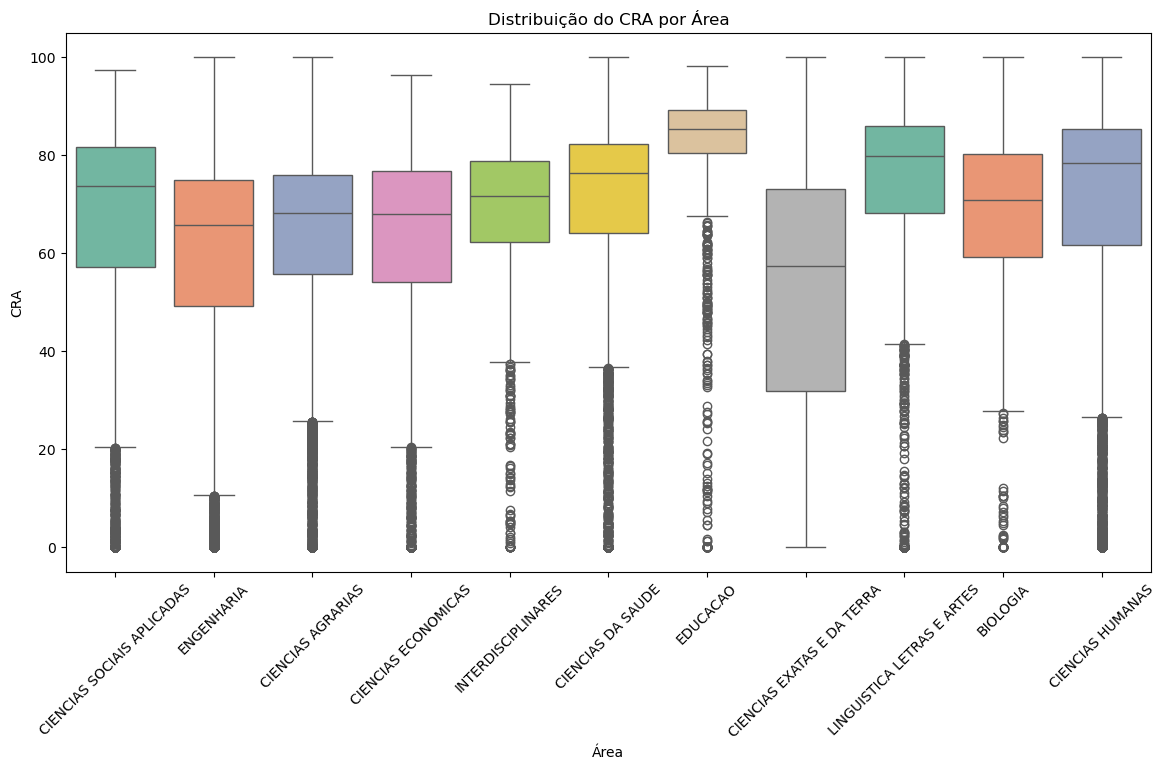

In [105]:
dfCRAArea = df[['Area','CRA']]

# Configurar o tamanho do gráfico
plt.figure(figsize=(14, 7))

# Plotar o box plot
sns.boxplot(data=dfCRAArea, x='Area', y='CRA', palette='Set2')

# Adicionar título e rótulos aos eixos
plt.title('Distribuição do CRA por Área')
plt.xlabel('Área')
plt.ylabel('CRA')

# Ajustar os limites do eixo Y para visualizar melhor
plt.ylim(bottom=dfCRAArea['CRA'].min() - 5, top=dfCRAArea['CRA'].max() + 5)

# Mostrar o gráfico
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo X para melhor visualização
plt.show()


Nesse caso iremos retirar os outliers menores que 20 já que sua ocorrencia é muito baixa e ele pesa significativamente para o calculo da media.

Text(0.5, 1.0, 'CRA por Área')

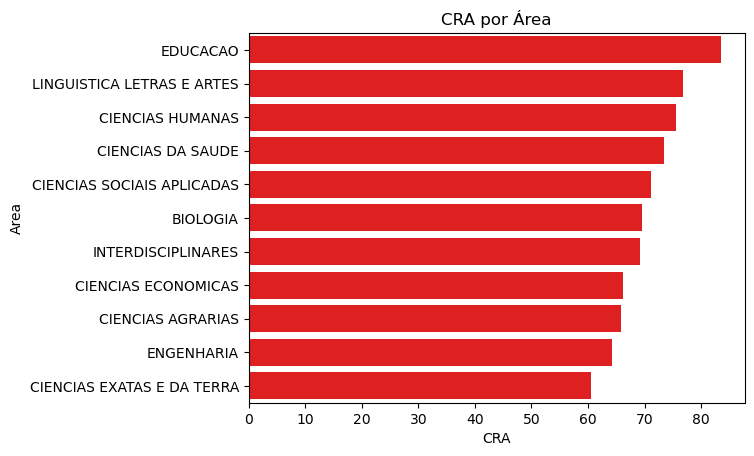

In [88]:
dfCRAArea_filtrado = dfCRAArea[dfCRAArea['CRA'] > 20]
dfCRAArea = dfCRAArea_filtrado.groupby('Area').mean().sort_values(by='CRA', ascending=False)
sns.barplot(dfCRAArea, y='Area', x='CRA', color="#ff0000", errorbar=None)
plt.title('CRA por Área')

In [77]:
dfCRAArea.groupby('Area').mean().sort_values(by='CRA', ascending=False)

,CRA
Area,
EDUCACAO,79.486080
LINGUISTICA LETRAS E ARTES,71.635714
CIENCIAS DA SAUDE,67.901785
CIENCIAS HUMANAS,67.726024
INTERDISCIPLINARES,66.825224
BIOLOGIA,66.082922
CIENCIAS SOCIAIS APLICADAS,64.642737
CIENCIAS AGRARIAS,62.940451
CIENCIAS ECONOMICAS,62.084908


## Conclusão (Por Área)
Percebe-se que olhando o gráfico que na parte superior tempos as áreas com maior taxa de CRA, sendo a com maior destaque a área da Educação com uma média de 79.49 de coeficiente acumulado. 


A area com menor desempenho foi a de Ciências Exatas e da Terra com uma média de 51.18 somente que é um valor considerado abaixo da média da universidade (que é de um CRA de valor igual a 60). Apesar disso, ela é a área que apresenta melhor distribuição de valores, com menos ocorrências de outliers.

#### Análise de CRA por Ano

Observe que o CRA é o Coeficiente de Rendimento Acumulado, ou seja, a média dos CRs desde a entrada do estudante no curso até sua saída. Logo, se desejamos saber qual a média de CRA por ano, devemos pegar apenas os anos de saída, pois são nesses anos que foi calculado pela última vez o CRA do aluno

In [6]:
# Pegando dados que importam
dfQ13porAno = df[['CRA', 'Saida_Ano']]
dfQ13porAno

,CRA,Saida_Ano
0,0.0,2000
1,71.2,2002
2,78.5,2005
3,56.0,2006
4,76.9,2004
...,...,...
74021,0.0,0
74022,NaN,0
74023,NaN,0
74024,NaN,0


In [27]:
df_agrupado = dfQ13porAno.groupby('Saida_Ano')['CRA'].agg(['mean', 'median', 'std']).reset_index().sort_values(by='mean', ascending=False)
dfQ13porAno['Saida_Ano'].size

74026

/tmp/ipykernel_4276/1461713857.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  bar_plot = sns.barplot(data=df_agrupado, x='Saida_Ano', y='mean', palette=cores, ci=None)
/tmp/ipykernel_4276/1461713857.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(data=df_agrupado, x='Saida_Ano', y='mean', palette=cores, ci=None)


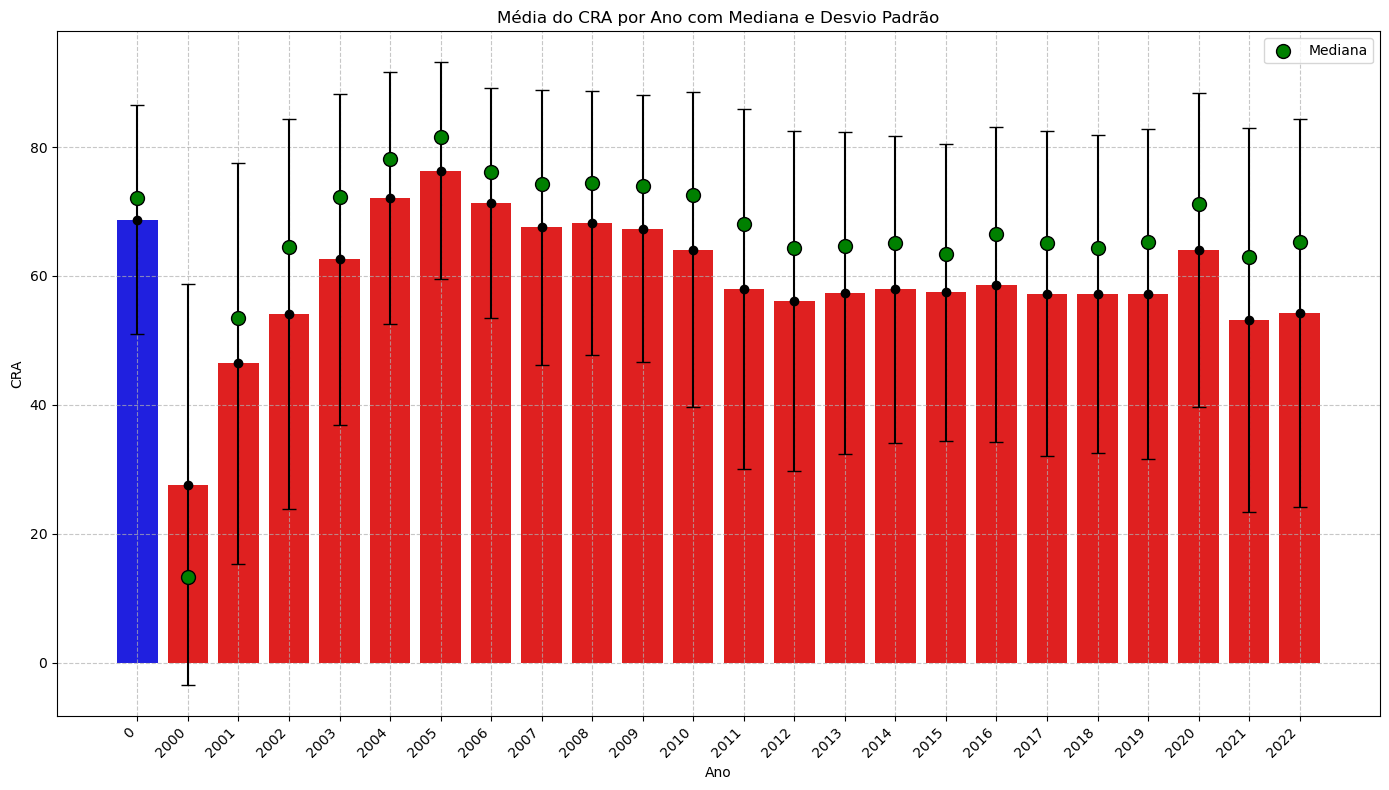

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supondo que dfQ13porAno é seu DataFrame original
# Agrupa os dados por ano e calcula a média, mediana e desvio padrão
df_agrupado = dfQ13porAno.groupby('Saida_Ano')['CRA'].agg(['mean', 'median', 'std']).reset_index().sort_values(by='mean', ascending=False)

# Define as cores das barras
cores = ['#ff0000' for _ in range(df_agrupado['Saida_Ano'].size)]
cores[0] = '#0000ff'  # A primeira barra será azul

# Cria o gráfico de barras
plt.figure(figsize=(14, 8))
bar_plot = sns.barplot(data=df_agrupado, x='Saida_Ano', y='mean', palette=cores, ci=None)

# Adiciona barras de erro para o desvio padrão
for index, row in df_agrupado.iterrows():
    bar_plot.errorbar(index, row['mean'], yerr=row['std'], fmt='o', color='black', capsize=5)

# Adiciona pontos para a mediana
plt.scatter(df_agrupado.index, df_agrupado['median'], color='green', s=100, zorder=5, label='Mediana', edgecolor='black')

# Configurações do gráfico
plt.xticks(ticks=df_agrupado.index, labels=df_agrupado['Saida_Ano'], rotation=45, ha='right')
plt.xlabel('Ano')
plt.ylabel('CRA')
plt.title('Média do CRA por Ano com Mediana e Desvio Padrão')
plt.legend()
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


### Analisando variação dos valores

/tmp/ipykernel_4276/593388911.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dfQ13porAno, x='Saida_Ano', y='CRA', palette='Set2')


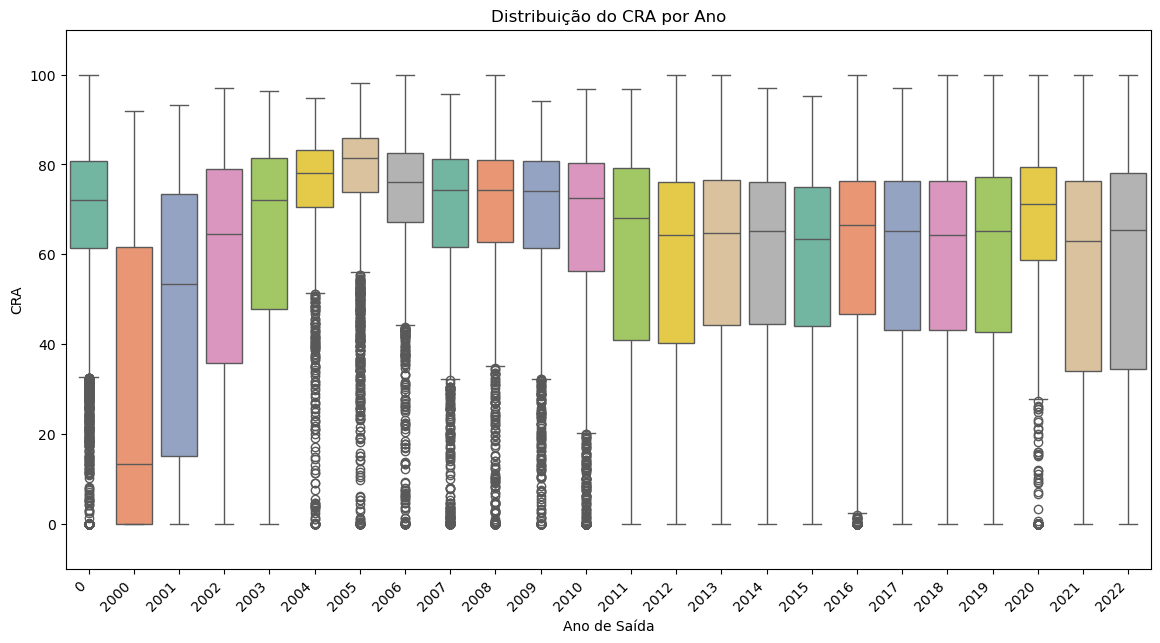

In [9]:
dfQ13porAno = df[['CRA', 'Saida_Ano']]

# Configurar o tamanho do gráfico
plt.figure(figsize=(14, 7))

# Plotar o box plot
sns.boxplot(data=dfQ13porAno, x='Saida_Ano', y='CRA', palette='Set2')

# Adicionar título e rótulos aos eixos
plt.title('Distribuição do CRA por Ano')
plt.xlabel('Ano de Saída')
plt.ylabel('CRA')


# Ajustar os limites do eixo Y para garantir que todos os dados sejam visíveis
plt.ylim(dfQ13porAno.groupby('Saida_Ano')['CRA'].min() - 10, dfQ13porAno.groupby('Saida_Ano')['CRA'].max() + 10)

# Ajustar rótulos do eixo X
plt.xticks(rotation=45, ha='right')  # Rotaciona e alinha os rótulos

# Mostrar o gráfico
plt.show()



### Analisando numéricamente a variação dos valores em relação a media

In [21]:
# Calcular a variância por ano
media_por_ano = dfQ13porAno.groupby('Saida_Ano')['CRA'].mean().reset_index()
media_por_ano.columns = ['Saida_Ano', 'Media']

# Calcular o desvio padrão por ano
desvio_padrao_por_ano = dfQ13porAno.groupby('Saida_Ano')['CRA'].std().reset_index()
desvio_padrao_por_ano.columns = ['Saida_Ano', 'Desvio_Padrao']

# Merge desvio padrão e média
dados_combinados = pd.merge(media_por_ano, desvio_padrao_por_ano, on='Saida_Ano')

# Calcular o Coeficiente de Variação (CV)
dados_combinados['Percentual_Variacao'] = (dados_combinados['Desvio_Padrao'] / dados_combinados['Media']) * 100

# Ordenar os resultados por percentual de variação em ordem decrescente
resultado_final = dados_combinados.sort_values(by='Percentual_Variacao', ascending=False)


resultado_final

,Saida_Ano,Media,Desvio_Padrao,Percentual_Variacao
1,2000,27.634426,31.046863,112.348500
2,2001,46.448454,31.127139,67.014371
22,2021,53.121142,29.774266,56.049747
3,2002,54.060623,30.249053,55.953949
23,2022,54.248478,30.089005,55.465160
12,2011,57.975327,27.956253,48.220949
13,2012,56.103998,26.395612,47.047649
20,2019,57.184809,25.642320,44.841138
18,2017,57.242850,25.183355,43.993887
14,2013,57.387695,24.974877,43.519567


In [23]:

# Supondo que dfQ13porAno é seu DataFrame original
# Agrupa os dados por ano e calcula a média e a mediana
df_grouped = dfQ13porAno.groupby('Saida_Ano')['CRA'].agg(['mean', 'median']).reset_index()

# Função para balancear média e mediana
def balancear_media_mediana(df):
    df_balanced = df.copy()
    for index, row in df_balanced.iterrows():
        mean = row['mean']
        median = row['median']
        
        # Ajusta os dados se a média e a mediana estiverem muito diferentes
        # Este é um exemplo simples, ajuste conforme necessário
        if abs(mean - median) > 0.1:  # ajuste o limite conforme necessário
            adjustment = (median - mean) / 2
            df_balanced.at[index, 'mean'] += adjustment
            df_balanced.at[index, 'median'] += adjustment

    return df_balanced

# Balanceia a média e a mediana
df_balanced = balancear_media_mediana(df_grouped)

# Exibe o resultado
print(df_balanced)


    Saida_Ano       mean     median
0           0  70.426438  73.773562
1        2000  20.467213   6.132787
2        2001  49.949227  56.950773
3        2002  59.280312  69.719688
4        2003  67.382234  77.017766
5        2004  75.151459  81.248541
6        2005  78.906489  84.093511
7        2006  73.765824  78.634176
8        2007  70.919929  77.680071
9        2008  71.313593  77.486407
10       2009  70.680196  77.319804
11       2010  68.343347  76.856653
12       2011  63.037663  73.162337
13       2012  60.251999  68.548001
14       2013  61.043848  68.356152
15       2014  61.521546  68.678454
16       2015  60.422184  66.377816
17       2016  62.562824  70.437176
18       2017  61.171425  69.028575
19       2018  60.737193  67.862807
20       2019  61.192405  69.207595
21       2020  67.552746  74.647254
22       2021  58.010571  67.789429
23       2022  59.774239  70.825761


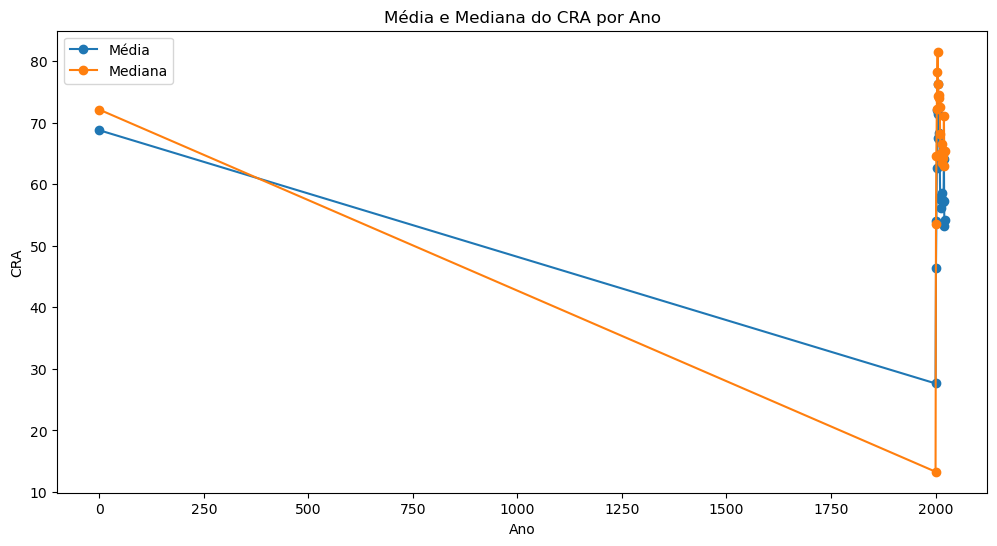

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
df_agrupado = dfQ13porAno.groupby('Saida_Ano')['CRA'].agg(['mean', 'median']).reset_index()

# Supondo que df_agrupado já contém média e mediana
plt.figure(figsize=(12, 6))
plt.plot(df_agrupado['Saida_Ano'], df_agrupado['mean'], label='Média', marker='o')
plt.plot(df_agrupado['Saida_Ano'], df_agrupado['median'], label='Mediana', marker='o')
plt.title('Média e Mediana do CRA por Ano')
plt.xlabel('Ano')
plt.ylabel('CRA')
plt.legend()
plt.show()


## Conclusão (Por Ano)
Analisando os dados e o gráfico da media se observa que 2005 teve o maior valor de CRA registrado sendo ele aproximadamente 76.31 e com a menor variação de valores dentre todos os anos. Já a menor media CRA registrado foi em 2000 com um valor de 27.63, com os valores apresentando uma extrema variação.

Note que existe uma média muito alta para as pessoas que sairam no ano 0 (azul). Isso é um fator muito interessante, visto que não se sabe o que é esse ano 0. Note que também não é um valor inválido como Nan. Portanto, vamos tentar dar uma olhada no que esse dado significa

#### Selecionando as colunas onde o ano de saída é 0

In [78]:
dfSaida0 = df[df['Saida_Ano'] == 0]
dfSaida0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13908 entries, 22899 to 74025
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Identificador            13908 non-null  int64  
 1   Ano_Nascimento           13904 non-null  float64
 2   Sexo                     13908 non-null  object 
 3   Campus                   13908 non-null  object 
 4   Curso_Identificador      13908 non-null  int64  
 5   Curso                    13908 non-null  object 
 6   UF_Nascimento            13908 non-null  object 
 7   Municipio_Nascimento     13908 non-null  object 
 8   Admissao                 13908 non-null  object 
 9   Saida                    13908 non-null  object 
 10  Codigo_Situacao_Aluno    13908 non-null  object 
 11  Situacao_Aluno           13908 non-null  object 
 12  Situacao_Aluno_Agrupada  13908 non-null  object 
 13  Modalidade_Inscrita      13900 non-null  float64
 14  ENEM                   

In [79]:
print('\nAnalisando exploratoriamente os dados dos alunos com Ano de saída == 0\n')
for column in ['Admissao_Ano', 'Num_Reprovacoes', 'Situacao_Aluno','Situacao_Aluno_Agrupada']:
    print(f'\nColuna: {column}\n', dfSaida0[column].value_counts())
print('\nAnalisando exploratoriamente os dados dos alunos com Ano de saída != 0\n')
for column in ['Admissao_Ano', 'Num_Reprovacoes', 'Situacao_Aluno','Situacao_Aluno_Agrupada']:
    print(f'\nColuna: {column}\n', df[df['Saida_Ano'] != 0][column].value_counts())


Analisando exploratoriamente os dados dos alunos com Ano de saída == 0


Coluna: Admissao_Ano
 Admissao_Ano
2022    3171
2020    2281
2019    2257
2021    2238
2018    2092
2017    1177
2016     475
2015     155
2014      36
2013      10
2023      10
2012       4
2009       1
2011       1
Name: count, dtype: int64

Coluna: Num_Reprovacoes
 Num_Reprovacoes
0     4661
1     2051
2     1430
3     1154
4      937
5      714
6      499
7      430
8      364
9      291
10     248
11     186
12     177
13     158
14     135
15     110
16      74
17      66
18      54
19      41
20      40
21      22
22      15
25      12
23      11
24       8
26       8
27       5
31       3
28       2
30       1
29       1
Name: count, dtype: int64

Coluna: Situacao_Aluno
 Situacao_Aluno
Normal                                                13426
Trancamento                                             323
Afastamento/Intercâmbio                                  48
Trancamento por Motivo de Saúde            

## Conclusão: O que é o ano 0?


Analizando exploratoriamente os dados, é possível perceber que os alunos com ano de saída igual a 0 são, em sua maioria, alunos que entraram na UFV nos últimos 6 anos e que ainda estão matrículados. Portanto, existem uma forte possibilidade de que sejam alunos que ainda não formaram. Porém não é possível afirmar nada com certeza absoluta, requerendo portanto steps adicionais de verificações tais como testes de hipótese.

## Resposta 10

- Qual campus recebe mais pessoas de fora do estado de Minas Gerais?

In [35]:
# Primeiramente, deve-se descobrir quais os campus existentes
df['Campus'].value_counts()

Campus
CAV    60339
CRP     8413
CAF     5274
Name: count, dtype: int64

Após uma rápida pesquisa, foi descoberto o seguinte padrão de nomenclatura:
- CAV: Campus Viçosa
- CAF: Campus Florestal
- CRP: Campus Rio Parnaíba

Separando os dados importantes:

In [36]:
dfCampus = df[['Campus','UF_Nascimento']]
dfCampus

,Campus,UF_Nascimento
0,CAV,RJ
1,CAV,DF
2,CAV,MG
3,CAV,MG
4,CAV,SP
...,...,...
74021,CAV,nan
74022,CAV,nan
74023,CAV,nan
74024,CAV,nan


Filtrando por campus:

In [37]:
dfCampusCav = dfCampus[dfCampus['Campus'] == 'CAV']
dfCampusCrp = dfCampus[dfCampus['Campus'] == 'CRP']
dfCampusCaf = dfCampus[dfCampus['Campus'] == 'CAF']


Contando o total de ocorrências de cada UF para cada Campus

In [41]:
dfCampusCavCount= dfCampusCav['UF_Nascimento'].value_counts().reset_index().sort_values(by='count', ascending=False)
dfCampusCafCount= dfCampusCaf['UF_Nascimento'].value_counts().reset_index().sort_values(by='count', ascending=False)
dfCampusCrpCount= dfCampusCrp['UF_Nascimento'].value_counts().reset_index().sort_values(by='count', ascending=False)
display(dfCampusCavCount.head(5))
display(dfCampusCafCount.head(5))
display(dfCampusCrpCount.head(5))


,UF_Nascimento,count
0,MG,45752
1,SP,5228
2,RJ,3145
3,ES,3083
4,BA,956


,UF_Nascimento,count
0,MG,4664
1,SP,322
2,RJ,99
3,BA,43
4,ES,42


,UF_Nascimento,count
0,MG,6915
1,SP,866
2,RJ,120
3,GO,92
4,BA,88


No processo de plotagem de grafico, pode-se perceber que é muito comum haverem valores que atrapalham a visualização, visto que muitas vezes são valores muito pequenos. Portanto, uma função que agrupa-se esses valores pequenos como sendo 'OUTROS' seria muito util:

In [47]:
# Recebe uma coluna de value_counts, uma coluna base, e filtra a coluna base substituindo os valores por 'OUTROS' dada uma porcentagem. E outras palavras, substitui os valores de columnValue por 'Outros' se o valor representar abaixo de uma determinada porcentagem
def GroupSmallDataIntoOthers(df, columnValue,valueCounts, value=0.005):
    df = df.copy()
    total = df[valueCounts].sum()
    df['CountOthers'] = (df[valueCounts]/total > value)
    df[columnValue] = df[columnValue].where(df['CountOthers'], 'OUTROS')
    df = df.drop(columns=['CountOthers'])
    df = df.groupby(columnValue).sum().sort_values(by=valueCounts, ascending=False).reset_index()
    return df


Filtrando dados pouco significantes numa unica categoria: Outros

In [48]:
dfCavFiltrado = GroupSmallDataIntoOthers(dfCampusCavCount, 'UF_Nascimento', 'count', value=0.007)
dfCafFiltrado = GroupSmallDataIntoOthers(dfCampusCafCount, 'UF_Nascimento', 'count', value=0.007)
dfCrpFiltrado = GroupSmallDataIntoOthers(dfCampusCrpCount, 'UF_Nascimento', 'count', value=0.01)
dfCrpFiltrado


,UF_Nascimento,count
0,MG,6915
1,SP,866
2,OUTROS,332
3,RJ,120
4,GO,92
5,BA,88


Após a filtragem

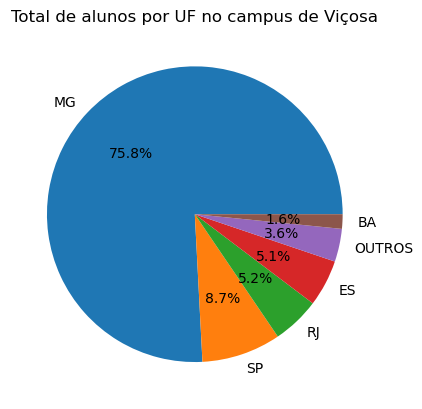

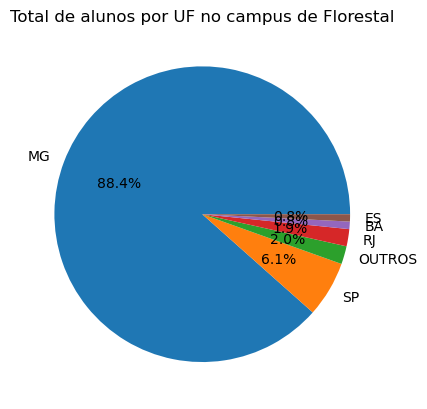

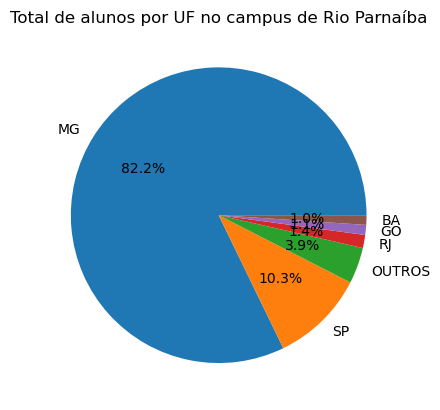

In [45]:
plt.pie(dfCavFiltrado['count'], labels=dfCavFiltrado['UF_Nascimento'] ,autopct='%1.1f%%')
plt.title('Total de alunos por UF no campus de Viçosa')
plt.show()
plt.pie(dfCafFiltrado['count'], labels=dfCafFiltrado['UF_Nascimento'] ,autopct='%1.1f%%')
plt.title('Total de alunos por UF no campus de Florestal')
plt.show()
plt.pie(dfCrpFiltrado['count'], labels=dfCrpFiltrado['UF_Nascimento'] ,autopct='%1.1f%%')
plt.title('Total de alunos por UF no campus de Rio Parnaíba')
plt.show()


### Conclusão

Optamos por fazer a visualização por Gráfico de Setores que nos da a visualização mais clara, já que esse grafico nos permite uma visão intuitiva da porcentagem dos valores. 
Percebe-se ao se fazer uma analise sobre esses graficos que a ordem de campos que recebem mais pessoas de fora do estado de Minas Gerais é: 
1. Campus de Viçosa
2. Campus de Rio Paranaíba
3. Campus de Florestal

Logo o campus recebe mais pessoas de fora do estado de Minas Gerais é o Campus de Viçosa, se observarmos as variaveis externas, como o campus ser o campi principal e possuir maior concorrencia e divulgação.

## Resposta 11

- O tempo de duração definido para os cinco cursos mais frequentados condiz com a media de duração gasto pelos alunos?

In [20]:
# Copiar o DataFrame
dfQ11= df.copy()

# Definindo os cinco cursos mais frequentados
cursos_Frequentados = list(dfQ11['Curso'].value_counts().head(5).index)
display(cursos_Frequentados)

dfQ11 = dfQ11[dfQ11['Curso'].isin(cursos_Frequentados)]

# Remover entradas com 'Saida' igual a '0'
dfQ11 = dfQ11.drop(dfQ11[dfQ11['Saida'] == '0'].index)

# Filtrar apenas os alunos com status de curso concluído
dfQ11 = dfQ11[dfQ11['Codigo_Situacao_Aluno'].isin(['C', 'B', 'I'])]

# Calcular o tempo de duração
dfQ11['TempoDuracao'] = dfQ11['Saida_Ano'] - dfQ11['Admissao_Ano']

dfQ11_cursos = dfQ11.groupby('Curso')['TempoDuracao'].agg(['describe', 'median']).reset_index()

# Mostrar os resultados
dfQ11_cursos.head()
# print(dfQ11_cursos['TempoDuracao'].mean())
display(dfQ11_cursos)

['AGRONOMIA',
 'ADMINISTRACAO',
 'CIENCIAS BIOLOGICAS',
 'QUIMICA',
 'EDUCACAO FISICA']

Curso describe                                               \
                          count      mean       std  min  25%  50%  75%  max   
0        ADMINISTRACAO   1669.0  4.125225  0.993633  0.0  4.0  4.0  4.0  8.0   
1            AGRONOMIA   3325.0  4.610827  1.156836  0.0  4.0  5.0  5.0  9.0   
2  CIENCIAS BIOLOGICAS   1252.0  3.879393  1.449603  0.0  4.0  4.0  5.0  9.0   
3      EDUCACAO FISICA   1424.0  3.629916  1.527441  0.0  3.0  4.0  4.0  9.0   
4              QUIMICA    811.0  3.641184  1.621836  0.0  3.0  4.0  5.0  8.0   

        median  
  TempoDuracao  
0          4.0  
1          5.0  
2          4.0  
3          4.0  
4          4.0

/tmp/ipykernel_2853/2336515300.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dfQ11, x='Curso', y='CRA', palette='Set2')


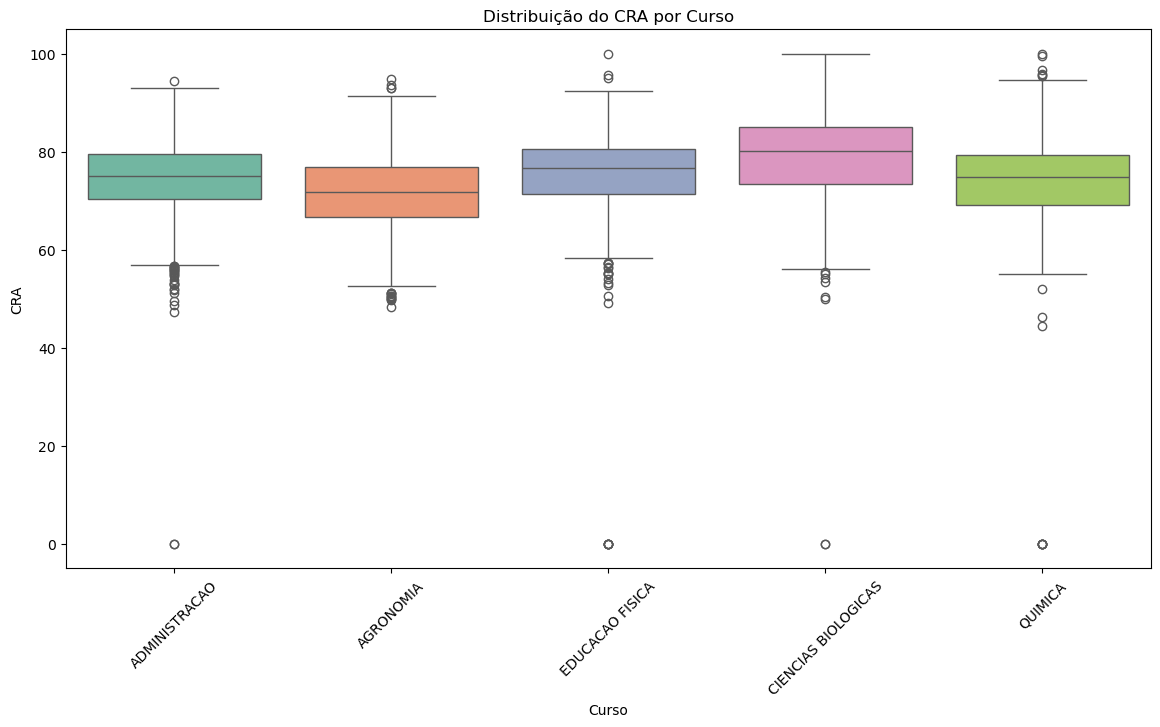

In [85]:
plt.figure(figsize=(14, 7))

# Plotando o gráfico de o box plot
sns.boxplot(data=dfQ11, x='Curso', y='CRA', palette='Set2')

# Adicionando o título e rótulos aos eixos
plt.title('Distribuição do CRA por Curso')
plt.xlabel('Curso')
plt.ylabel('CRA')

#  Mostrando o gráfico
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo X para melhor visualização
plt.show()

### Conclusão 11

Para fazermos essa analise foi necessário coletar as informações de tempo de duração de cada curso, disponibilizado pela propria coordenação de cada curso no site de dominio Universidade Federal de Viçosa.
Cursos com duas possibilidades de horario são, pois apresentam opção norturna que dura mais tempo que a integral ou opção bacharelado e licenciatura.


| Curso                  	| Tempo Pesquisado  | Media do Tempo Obtido | Mediana do Tempo Obtido	| 
|------------------------	|-----------------	|---------------------	|--------------------------	|
| {{ADMINISTRACAO        }} | 4 a 5 anos        | 4.125225	            | 4.0                       |
| {{AGRONOMIA          }} 	| 5 anos        	| 4.610827              | 5.0                       |
| {{CIENCIAS BIOLOGICAS  }} | 4 a 5 anos        | 3.879393	            | 4.0                       |
| {{EDUCACAO FISICA     }} 	| 4 anos        	| 3.629916              | 4.0                       |
| {{QUIMICA           }} 	| 4 a 5 anos     	| 3.641184              | 4.0                       |


Por analise de semestres definidos pela UFV como necessários, podemos ver que não há diferença significativa entre os valores e as estatiticas descritivas coletadas. Baseado nesses fatores podemos dizer que o tempo é condizente.